In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df=pd.read_csv('new_insurance_data.csv')

In [3]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [4]:
#shape of dataset: row x columns
df.shape

(1338, 13)

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
#Checking the missing values
df.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [8]:
#creating col_list variable and assigning dataset columns as list to it
col_list=list(df.columns)

In [10]:
#Iterating through each column to fill missing values with mode of the column (for object types) and with mean of data for other datatypes
for i in col_list:
    if df[i].dtypes=='object':
        df[i]=df[i].fillna(df[i].mode())
    else:
        df[i]= df[i].fillna(df[i].mean())

In [11]:
df.isna().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [12]:
#checking for duplicate values
df.duplicated().sum()

0

In [13]:
df.shape

(1338, 13)

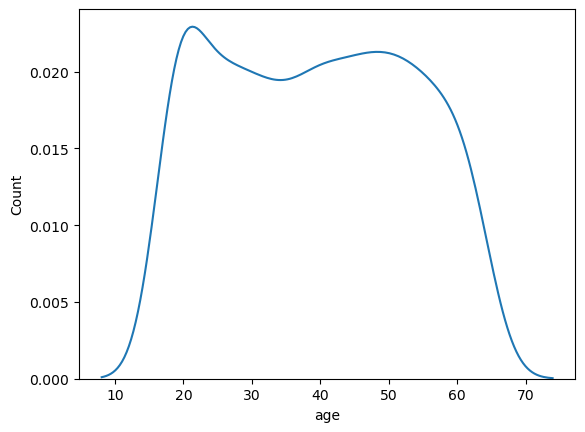

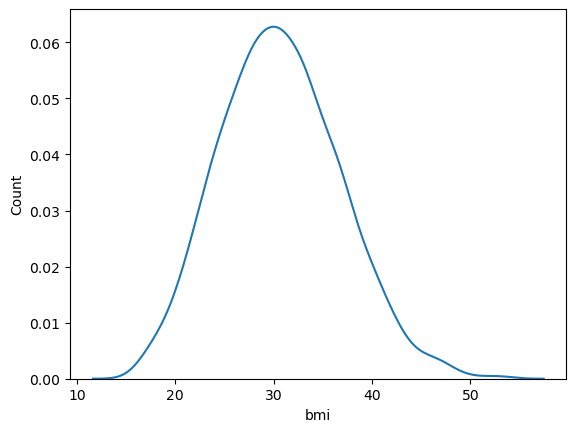

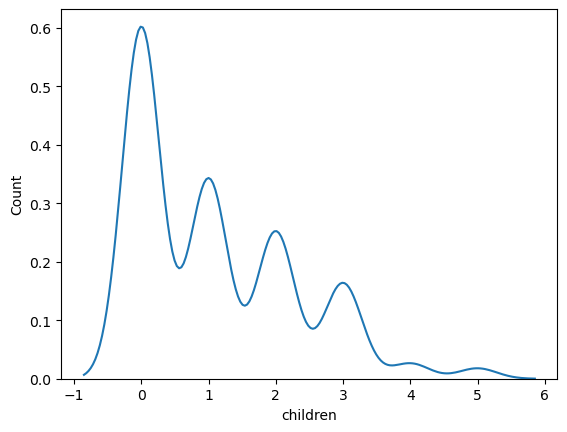

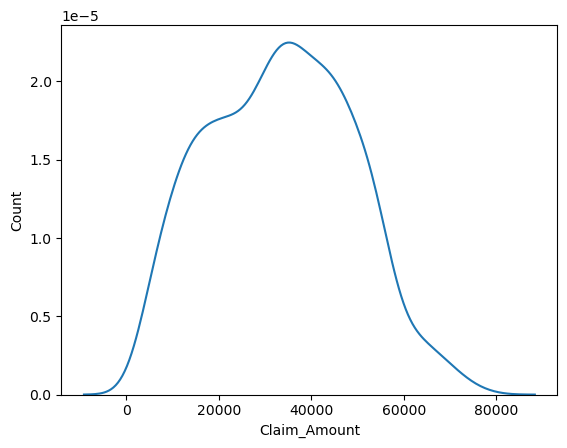

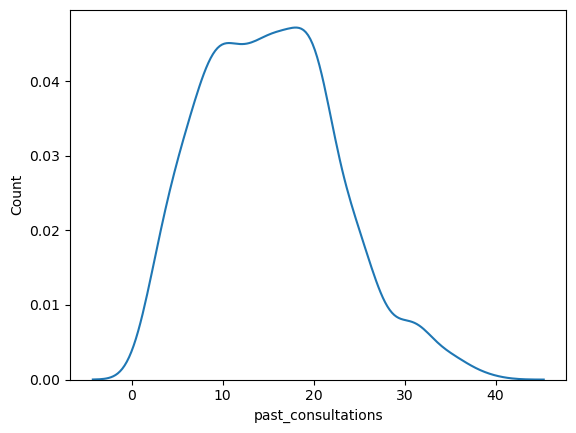

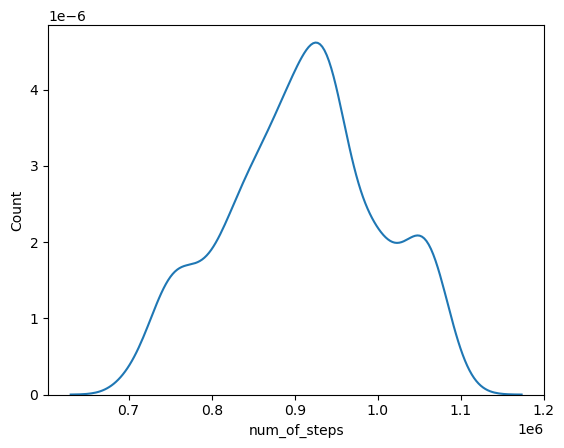

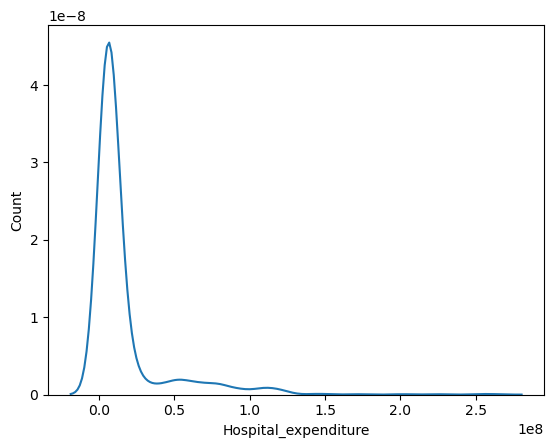

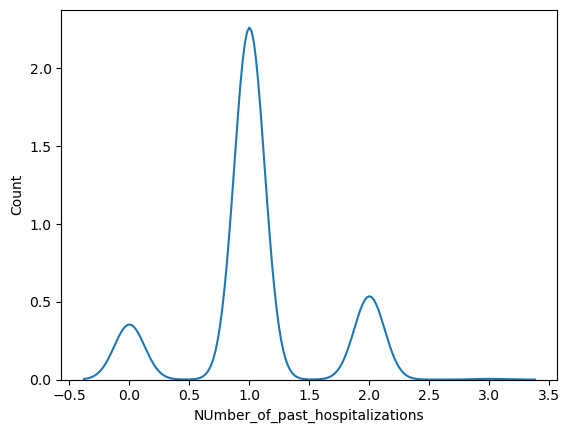

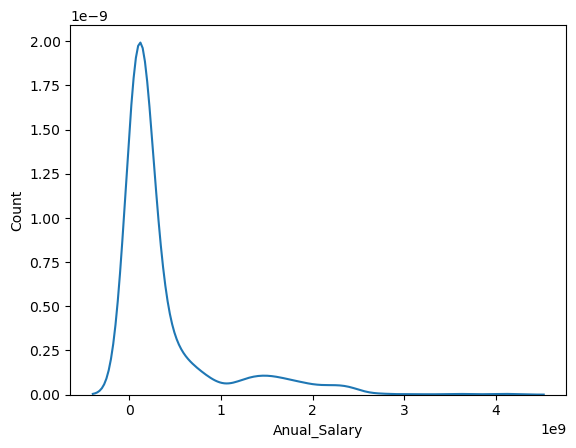

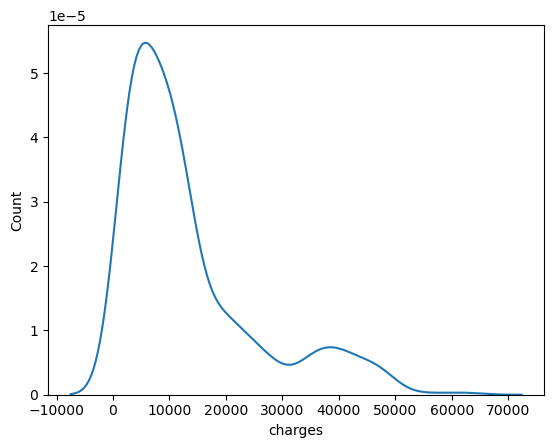

In [14]:
#Plotting kde plot for numeric columns to check distribution of data
for i in col_list:
    if df[i].dtype in ['int64','float64']:
        sns.kdeplot(df[i])
        plt.xlabel(i)
        plt.ylabel('Count')

        plt.show()

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

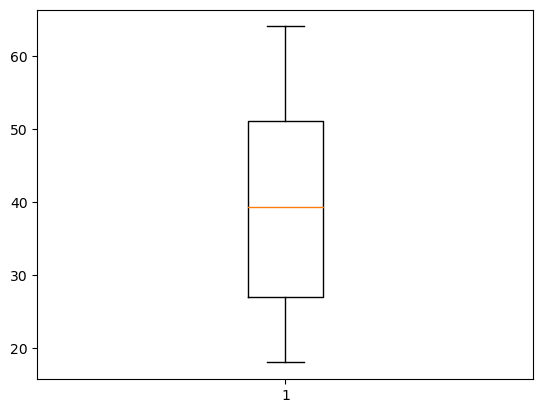

In [16]:
#Removing outliers for Age column

Q1=df.age.quantile(0.25)
Q3=df.age.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
df=df[(df.age>=lower_limit)&(df.bmi<=upper_limit)]
plt.boxplot(df['age'])
plt.show()

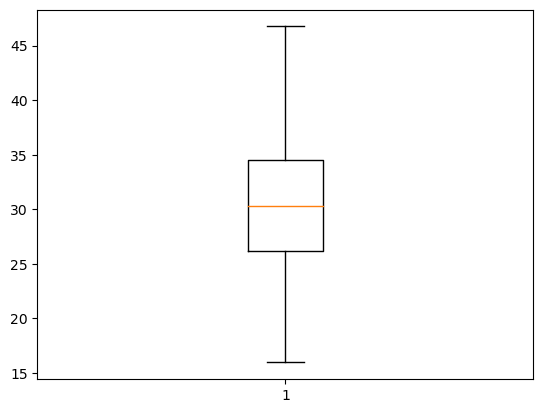

In [17]:
#Removing outliers for bmi column

Q1=df.bmi.quantile(0.25)
Q3=df.bmi.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
df=df[(df.bmi>=lower_limit)&(df.bmi<=upper_limit)]
plt.boxplot(df['bmi'])
plt.show()

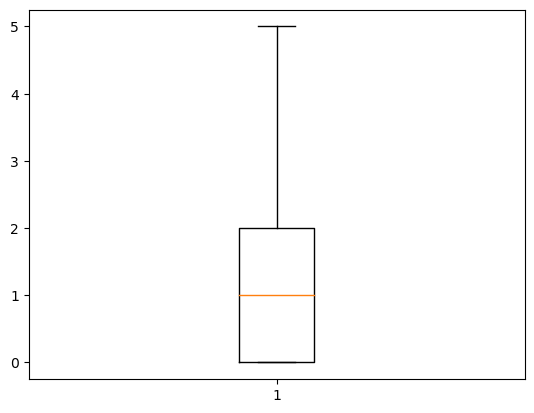

In [18]:
#Removing outliers for children column

Q1=df.children.quantile(0.25)
Q3=df.children.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
df=df[(df.children>=lower_limit)&(df.children<=upper_limit)]
plt.boxplot(df['children'])
plt.show()

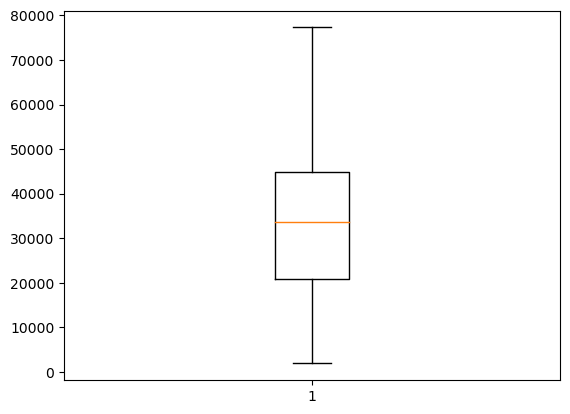

In [19]:
#Removing outliers for Claim_Amount column

Q1=df.Claim_Amount.quantile(0.25)
Q3=df.Claim_Amount.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
df=df[(df.Claim_Amount>=lower_limit)&(df.Claim_Amount<=upper_limit)]
plt.boxplot(df['Claim_Amount'])
plt.show()

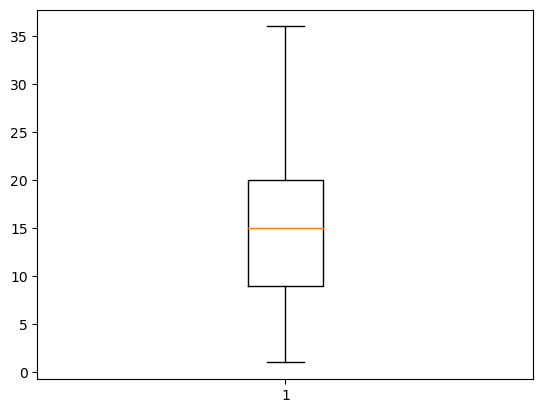

In [20]:
#Removing outliers for past_consultations column

Q1=df.past_consultations.quantile(0.25)
Q3=df.past_consultations.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
df=df[(df.past_consultations>=lower_limit)&(df.past_consultations<=upper_limit)]
plt.boxplot(df['past_consultations'])
plt.show()

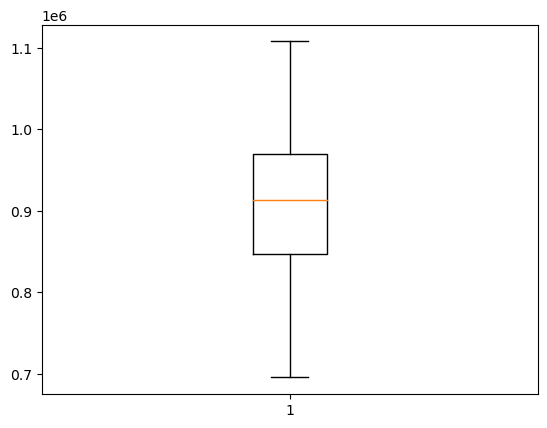

In [21]:
#Removing outliers for num_of_steps column

Q1=df.num_of_steps.quantile(0.25)
Q3=df.num_of_steps.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
df=df[(df.num_of_steps>=lower_limit)&(df.num_of_steps<=upper_limit)]
plt.boxplot(df['num_of_steps'])
plt.show()

In [22]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

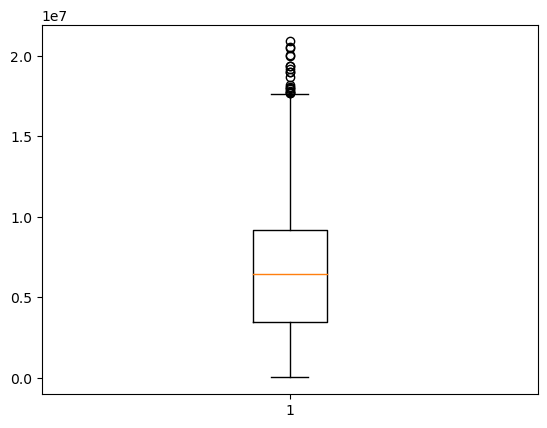

In [23]:
#Removing outliers for Hospital_expenditure column

Q1=df.Hospital_expenditure.quantile(0.25)
Q3=df.Hospital_expenditure.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
df=df[(df.Hospital_expenditure>=lower_limit)&(df.Hospital_expenditure<=upper_limit)]
plt.boxplot(df['Hospital_expenditure'])
plt.show()

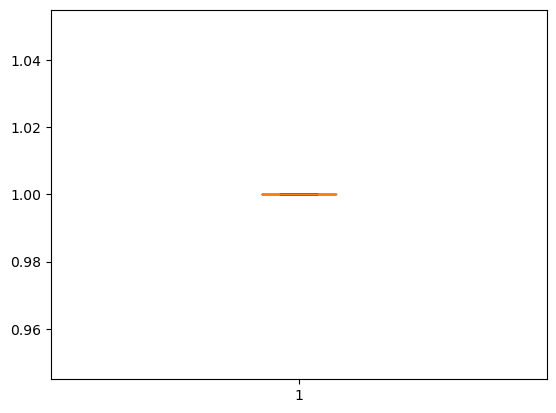

In [24]:
#Removing outliers for NUmber_of_past_hospitalizations column

Q1=df.NUmber_of_past_hospitalizations.quantile(0.25)
Q3=df.NUmber_of_past_hospitalizations.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
df=df[(df.NUmber_of_past_hospitalizations>=lower_limit)&(df.NUmber_of_past_hospitalizations<=upper_limit)]
plt.boxplot(df['NUmber_of_past_hospitalizations'])
plt.show()

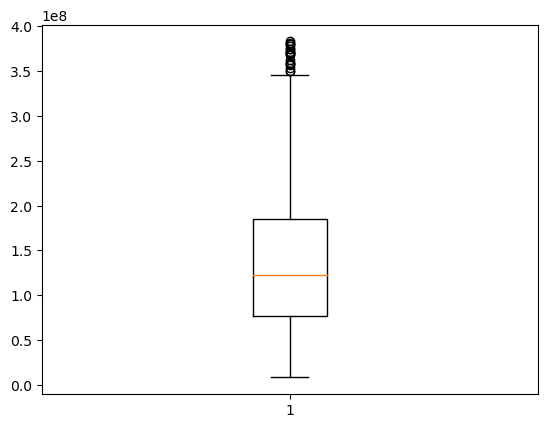

In [25]:
#Removing outliers for Anual_Salary column

Q1=df.Anual_Salary.quantile(0.25)
Q3=df.Anual_Salary.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
df=df[(df.Anual_Salary>=lower_limit)&(df.Anual_Salary<=upper_limit)]
plt.boxplot(df['Anual_Salary'])
plt.show()

In [26]:
#Checking the correlation
df.corr()*100

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,100.000000,18.432723,-14.952078,7.046793,12.932445,64.989332,12.094526,NaN,40.015548,55.334851
bmi,18.432723,100.000000,0.452873,-0.729542,-1.477207,3.315348,0.587448,NaN,-1.040907,-0.097082
children,-14.952078,0.452873,100.000000,0.480305,-0.028029,-0.657149,-5.547751,NaN,-5.783109,-4.330866
Claim_Amount,7.046793,-0.729542,0.480305,100.000000,5.063952,17.115011,3.271517,NaN,13.848291,16.835291
past_consultations,12.932445,-1.477207,-0.028029,5.063952,100.000000,25.134412,9.830423,NaN,24.871385,26.029193
num_of_steps,64.989332,3.315348,-0.657149,17.115011,25.134412,100.000000,32.405422,NaN,83.553812,95.715606
Hospital_expenditure,12.094526,0.587448,-5.547751,3.271517,9.830423,32.405422,100.000000,NaN,37.452662,36.873234
NUmber_of_past_hospitalizations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anual_Salary,40.015548,-1.040907,-5.783109,13.848291,24.871385,83.553812,37.452662,NaN,100.000000,91.616932
charges,55.334851,-0.097082,-4.330866,16.835291,26.029193,95.715606,36.873234,NaN,91.616932,100.000000


<Axes: >

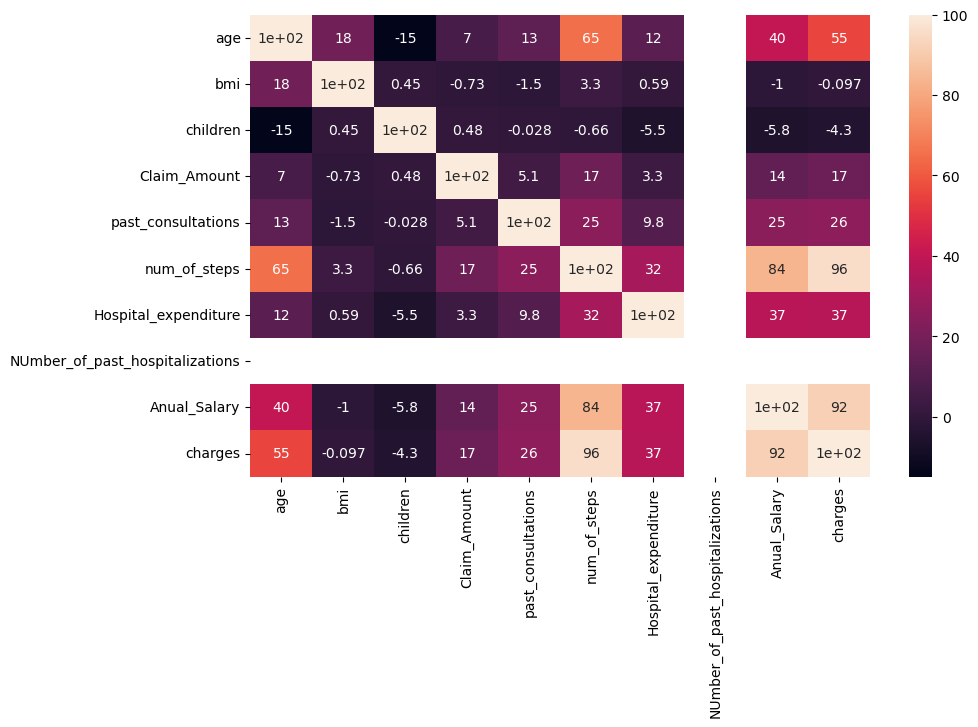

In [27]:
#Checking the correlation using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr()*100, annot=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 151 to 1069
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              881 non-null    float64
 1   sex                              881 non-null    object 
 2   bmi                              881 non-null    float64
 3   children                         881 non-null    float64
 4   smoker                           881 non-null    object 
 5   Claim_Amount                     881 non-null    float64
 6   past_consultations               881 non-null    float64
 7   num_of_steps                     881 non-null    float64
 8   Hospital_expenditure             881 non-null    float64
 9   NUmber_of_past_hospitalizations  881 non-null    float64
 10  Anual_Salary                     881 non-null    float64
 11  region                           881 non-null    object 
 12  charges            

In [29]:
df.shape

(881, 13)

In [30]:
#Removing multicollinearity (vif)
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [31]:
col_list=[]
for col in df.columns:
    if((df[col].dtype!='object')& (col!= 'charges')):
        col_list.append(col)

In [32]:
col_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [33]:
len(col_list)

9

In [34]:
x=df[col_list]

In [35]:
x

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
151,25.0,27.550,0.0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07
152,22.0,20.235,0.0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07
153,25.0,35.625,0.0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07
154,20.0,31.130,2.0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07
155,21.0,17.400,1.0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07
...,...,...,...,...,...,...,...,...,...
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08


In [36]:
vif_data=pd.DataFrame()
vif_data['Feature']=x.columns

In [37]:
vif_data

,Feature
0,age
1,bmi
2,children
3,Claim_Amount
4,past_consultations
5,num_of_steps
6,Hospital_expenditure
7,NUmber_of_past_hospitalizations
8,Anual_Salary


In [38]:
vif_data['Vif']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]

In [39]:
vif_data

,Feature,Vif
0,age,2.196194
1,bmi,1.052717
2,children,1.076523
3,Claim_Amount,1.035033
4,past_consultations,1.073989
5,num_of_steps,5.882074
6,Hospital_expenditure,1.173208
7,NUmber_of_past_hospitalizations,1393.169724
8,Anual_Salary,3.983678


In [40]:
df=df.drop(['NUmber_of_past_hospitalizations'], axis=1)

In [41]:
df.shape

(881, 12)

In [42]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary,region,charges
151,25.0,male,27.550,0.0,no,39148.95495,10.0,780652.0,8.614147e+06,5.452601e+07,northwest,2523.16950
152,22.0,female,20.235,0.0,no,41547.52536,13.0,802627.0,2.491594e+05,1.671847e+07,northwest,2527.81865
153,25.0,male,35.625,0.0,no,39660.60193,12.0,770773.0,3.043323e+06,4.852694e+07,northwest,2534.39375
154,20.0,male,31.130,2.0,no,16032.87148,7.0,769255.0,1.599069e+06,2.441262e+07,southeast,2566.47070
155,21.0,female,17.400,1.0,no,31090.98977,21.0,778769.0,3.015365e+06,5.853579e+07,southwest,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,3.696849e+08,northeast,19798.05455


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 151 to 1069
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   881 non-null    float64
 1   sex                   881 non-null    object 
 2   bmi                   881 non-null    float64
 3   children              881 non-null    float64
 4   smoker                881 non-null    object 
 5   Claim_Amount          881 non-null    float64
 6   past_consultations    881 non-null    float64
 7   num_of_steps          881 non-null    float64
 8   Hospital_expenditure  881 non-null    float64
 9   Anual_Salary          881 non-null    float64
 10  region                881 non-null    object 
 11  charges               881 non-null    float64
dtypes: float64(9), object(3)
memory usage: 89.5+ KB


In [44]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [45]:
#Splitting the data into dependent and independent variables
x=df.loc[:,['age', 'bmi', 'children', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'Anual_Salary']]

In [46]:
y=df.iloc[:,-1]

In [47]:
x

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary
151,25.0,27.550,0.0,39148.95495,10.0,780652.0,8.614147e+06,5.452601e+07
152,22.0,20.235,0.0,41547.52536,13.0,802627.0,2.491594e+05,1.671847e+07
153,25.0,35.625,0.0,39660.60193,12.0,770773.0,3.043323e+06,4.852694e+07
154,20.0,31.130,2.0,16032.87148,7.0,769255.0,1.599069e+06,2.441262e+07
155,21.0,17.400,1.0,31090.98977,21.0,778769.0,3.015365e+06,5.853579e+07
...,...,...,...,...,...,...,...,...
1046,29.0,27.940,1.0,51168.25474,23.0,993751.0,1.665982e+07,3.712188e+08
1048,31.0,25.900,3.0,46619.40230,27.0,989387.0,1.361938e+07,3.812895e+08
1050,31.0,29.810,0.0,24382.58056,21.0,973924.0,1.028991e+07,3.745310e+08
1062,43.0,20.045,2.0,21596.43846,10.0,994419.0,1.083030e+07,3.696849e+08


In [48]:
y

151      2523.16950
152      2527.81865
153      2534.39375
154      2566.47070
155      2585.26900
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 881, dtype: float64

In [49]:
# Train Test split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=0)

In [51]:
#Building model
lr_model=LinearRegression()

In [52]:
#Training the model
lr_model.fit(x_train, y_train)

LinearRegression()

In [53]:
#Prediction
pred=lr_model.predict(x_test)

In [54]:
#framing a dataframe to avaluate the errors
error_pred=pd.DataFrame(columns=['Actual Data', 'Predictions'])

In [55]:
error_pred

,Actual Data,Predictions


In [56]:
#feeding the data to dataframe
error_pred['Actual Data']=y_test

In [57]:
error_pred

,Actual Data,Predictions
301,4428.88785,NaN
557,7727.25320,NaN
665,9301.89355,NaN
252,3847.67400,NaN
738,10450.55200,NaN
...,...,...
513,7153.55390,NaN
518,7196.86700,NaN
415,5836.52040,NaN
471,6571.02435,NaN


In [58]:
#Now calculating error:
error_pred['Error']=error_pred['Actual Data']-error_pred['Predictions']

In [59]:
error_pred

,Actual Data,Predictions,Error
301,4428.88785,NaN,NaN
557,7727.25320,NaN,NaN
665,9301.89355,NaN,NaN
252,3847.67400,NaN,NaN
738,10450.55200,NaN,NaN
...,...,...,...
513,7153.55390,NaN,NaN
518,7196.86700,NaN,NaN
415,5836.52040,NaN,NaN
471,6571.02435,NaN,NaN


In [60]:
#R2 score
from sklearn.metrics import *

In [61]:
r2_test=r2_score(y_test,pred)

In [62]:
r2_test*100

96.05264390520651